## Sales Figures Forecast using Recurrent Neural Network

### Part 1 - Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('beer.csv', header=0)

In [3]:
## renaming column to remove extra spaces
df.columns = ['OzBeerSales']

In [4]:
df.head()

,OzBeerSales
0,284.4
1,212.8
2,226.9
3,308.4
4,262.0


In [5]:
print(len(df))

72


In [6]:
df.describe()

,OzBeerSales
count,72.000000
mean,329.880556
std,73.468385
min,212.800000
25%,272.575000
50%,317.500000
75%,379.725000
max,525.000000


##### Adding a date column to this time series data

In [7]:
df['date'] = pd.date_range(start='1/1/2000', periods=len(df), freq='q')

In [8]:
df.set_index('date', inplace=True)

In [9]:
df.head()

,OzBeerSales
date,
2000-03-31,284.4
2000-06-30,212.8
2000-09-30,226.9
2000-12-31,308.4
2001-03-31,262.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2000-03-31 to 2017-12-31
Data columns (total 1 columns):
OzBeerSales    72 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


##### Plot the Sales data

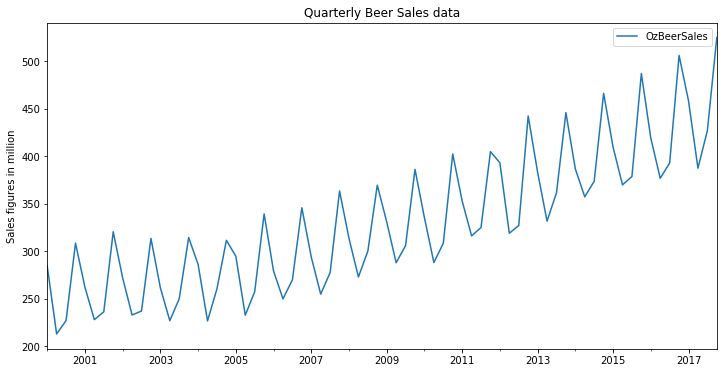

In [11]:
title  = 'Quarterly Beer Sales data'
ylabel = 'Sales figures in million'
xlabel = '' 

ax = df.plot(figsize=(12,6),title=title)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

##### Split the data into train/test sets

In [12]:
# Set two years for testing
train = df.iloc[:64]
test = df.iloc[64:]

train = np.array(train)
test = np.array(test)

In [13]:
print(train)
print('\n')
print(test)

[[284.4]
 [212.8]
 [226.9]
 [308.4]
 [262. ]
 [227.9]
 [236.1]
 [320.4]
 [271.9]
 [232.8]
 [237. ]
 [313.4]
 [261.4]
 [226.8]
 [249.9]
 [314.3]
 [286.1]
 [226.5]
 [260.4]
 [311.4]
 [294.7]
 [232.6]
 [257.2]
 [339.2]
 [279.1]
 [249.8]
 [269.8]
 [345.7]
 [293.8]
 [254.7]
 [277.5]
 [363.4]
 [313.4]
 [272.8]
 [300.1]
 [369.5]
 [330.8]
 [287.8]
 [305.9]
 [386.1]
 [335.2]
 [288. ]
 [308.3]
 [402.3]
 [352.8]
 [316.1]
 [324.9]
 [404.8]
 [393. ]
 [318.9]
 [327. ]
 [442.3]
 [383.1]
 [331.6]
 [361.4]
 [445.9]
 [386.6]
 [357.2]
 [373.6]
 [466.2]
 [409.6]
 [369.8]
 [378.6]
 [487. ]]


[[419.2]
 [376.7]
 [392.8]
 [506.1]
 [458.4]
 [387.4]
 [426.9]
 [525. ]]


#### Feature Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
## MinMaxScaler is used due to Sigmoid Function in RNN

# set up the scaler
scaler = MinMaxScaler()

In [15]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(train)

# transform train and test sets
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

In [16]:
print(train_scaled)
print('\n')
print(test_scaled)

[[0.26112327]
 [0.        ]
 [0.05142232]
 [0.34865062]
 [0.17943107]
 [0.05506929]
 [0.08497447]
 [0.3924143 ]
 [0.21553611]
 [0.07293946]
 [0.08825675]
 [0.36688549]
 [0.17724289]
 [0.05105762]
 [0.1353027 ]
 [0.37016776]
 [0.26732312]
 [0.04996353]
 [0.17359592]
 [0.35959154]
 [0.29868709]
 [0.07221007]
 [0.1619256 ]
 [0.46097739]
 [0.24179431]
 [0.134938  ]
 [0.20787746]
 [0.48468271]
 [0.29540481]
 [0.15280817]
 [0.23595915]
 [0.54923414]
 [0.36688549]
 [0.21881838]
 [0.31838074]
 [0.57148067]
 [0.43034282]
 [0.27352298]
 [0.33953319]
 [0.63202042]
 [0.4463895 ]
 [0.27425237]
 [0.34828592]
 [0.69110139]
 [0.51057622]
 [0.37673231]
 [0.40882567]
 [0.70021882]
 [0.65718454]
 [0.38694384]
 [0.41648432]
 [0.83698031]
 [0.6210795 ]
 [0.43326039]
 [0.54194019]
 [0.85010941]
 [0.63384391]
 [0.5266229 ]
 [0.58643326]
 [0.92414296]
 [0.71772429]
 [0.57257476]
 [0.60466813]
 [1.        ]]


[[0.75273523]
 [0.59773888]
 [0.65645514]
 [1.06965718]
 [0.89569657]
 [0.63676149]
 [0.78081692]
 [1

In [17]:
## Data structure with 4 timesteps and 1 output
## 4 timesteps -> 1 year, different values should be tried for this to find optimal value
## This model will be trained to learn from 4 timesteps to predict 5th timestep

X_train = []
y_train = []

for i in range(4, 64):
    X_train.append(train_scaled[i-4:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
print(X_train)
print('\n')
print(y_train)

[[0.26112327 0.         0.05142232 0.34865062]
 [0.         0.05142232 0.34865062 0.17943107]
 [0.05142232 0.34865062 0.17943107 0.05506929]
 [0.34865062 0.17943107 0.05506929 0.08497447]
 [0.17943107 0.05506929 0.08497447 0.3924143 ]
 [0.05506929 0.08497447 0.3924143  0.21553611]
 [0.08497447 0.3924143  0.21553611 0.07293946]
 [0.3924143  0.21553611 0.07293946 0.08825675]
 [0.21553611 0.07293946 0.08825675 0.36688549]
 [0.07293946 0.08825675 0.36688549 0.17724289]
 [0.08825675 0.36688549 0.17724289 0.05105762]
 [0.36688549 0.17724289 0.05105762 0.1353027 ]
 [0.17724289 0.05105762 0.1353027  0.37016776]
 [0.05105762 0.1353027  0.37016776 0.26732312]
 [0.1353027  0.37016776 0.26732312 0.04996353]
 [0.37016776 0.26732312 0.04996353 0.17359592]
 [0.26732312 0.04996353 0.17359592 0.35959154]
 [0.04996353 0.17359592 0.35959154 0.29868709]
 [0.17359592 0.35959154 0.29868709 0.07221007]
 [0.35959154 0.29868709 0.07221007 0.1619256 ]
 [0.29868709 0.07221007 0.1619256  0.46097739]
 [0.07221007 

In [19]:
# Reshaping -> required as X_train is input to RNN

# np.reshape(x,(a,b,c))
# a -> number of blocks
# b -> number of rows
# c -> number of columns

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
print(X_train.shape[0]) 

60


In [21]:
print(X_train.shape[1]) 

4


In [114]:
print(X_train)

[[[0.26112327]
  [0.        ]
  [0.05142232]
  [0.34865062]]

 [[0.        ]
  [0.05142232]
  [0.34865062]
  [0.17943107]]

 [[0.05142232]
  [0.34865062]
  [0.17943107]
  [0.05506929]]

 [[0.34865062]
  [0.17943107]
  [0.05506929]
  [0.08497447]]

 [[0.17943107]
  [0.05506929]
  [0.08497447]
  [0.3924143 ]]

 [[0.05506929]
  [0.08497447]
  [0.3924143 ]
  [0.21553611]]

 [[0.08497447]
  [0.3924143 ]
  [0.21553611]
  [0.07293946]]

 [[0.3924143 ]
  [0.21553611]
  [0.07293946]
  [0.08825675]]

 [[0.21553611]
  [0.07293946]
  [0.08825675]
  [0.36688549]]

 [[0.07293946]
  [0.08825675]
  [0.36688549]
  [0.17724289]]

 [[0.08825675]
  [0.36688549]
  [0.17724289]
  [0.05105762]]

 [[0.36688549]
  [0.17724289]
  [0.05105762]
  [0.1353027 ]]

 [[0.17724289]
  [0.05105762]
  [0.1353027 ]
  [0.37016776]]

 [[0.05105762]
  [0.1353027 ]
  [0.37016776]
  [0.26732312]]

 [[0.1353027 ]
  [0.37016776]
  [0.26732312]
  [0.04996353]]

 [[0.37016776]
  [0.26732312]
  [0.04996353]
  [0.17359592]]

 [[0.267

In [22]:
print(X_train.ndim)

3


### Part 2 - Building the RNN

In [23]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [24]:
# Defining the RNN
model = Sequential()

# Input shape
# 3D tensor with shape (batch_size, timesteps, input_dim).
# input_dim can be more than 1 if the sales figures are correlated with other variables

In [25]:
# 1st LSTM layer 
model.add(LSTM(units = 4, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Dropout regularisation
model.add(Dropout(0.25))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
# 2nd LSTM layer
model.add(LSTM(units = 4, return_sequences = True))
model.add(Dropout(0.25))

In [27]:
# 3rd LSTM layer
model.add(LSTM(units = 4))
model.add(Dropout(0.25))

In [28]:
# Output layer
model.add(Dense(units = 1))

In [29]:
# Compiling the RNN
# Generally RMSprop is recommended for RNN but also compare adam
model.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')

In [30]:
# Fitting the RNN
model.fit(X_train, y_train, epochs = 100, batch_size = 4)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60/60 [==============================] - 6s 102ms/step - loss: 0.1744
Epoch 2/100
60/60 [==============================] - 0s 5ms/step - loss: 0.1277
Epoch 3/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0998
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0856
Epoch 5/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0598A: 0s - loss: 0.06
Epoch 6/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0582
Epoch 7/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0497
Epoch 8/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0559
Epoch 9/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0623
Epoch 10/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0500
Epoch 11/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0568
Epoch 12/100
60/60 [==============================

60/60 [==============================] - 1s 12ms/step - loss: 0.0170
Epoch 97/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0232
Epoch 98/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0241
Epoch 99/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0181
Epoch 100/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0240


### Part 3 - Predictions 

In [31]:
# Using Complete dataset
inputs = df[len(df) - len(test) - 4:].values
inputs = inputs.reshape(-1,1)


In [33]:
inputs = scaler.transform(inputs)

In [60]:
# we are using 4 timesteps to predict 5th
# Also to predict 8 quarters, we need to use 8+4 as our 2nd value in range below

X_test = []
for i in range(4, 12):
    X_test.append(inputs[i-4:i, 0])   


In [61]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [62]:
predictions = model.predict(X_test)

In [63]:
predictions_actual = scaler.inverse_transform(predictions)

In [91]:
df_from_array = pd.DataFrame({'Test Data': test[:, 0], 'Predictions': predictions_actual[:, 0]})

pd.options.display.float_format = '{:,.4f}'.format
print(df_from_array)

   Test Data  Predictions
0   419.2000     395.3027
1   376.7000     390.7086
2   392.8000     413.5700
3   506.1000     439.0870
4   458.4000     404.6032
5   387.4000     401.8909
6   426.9000     429.0710
7   525.0000     457.2743


#### Plotting Actual vs Predicted data

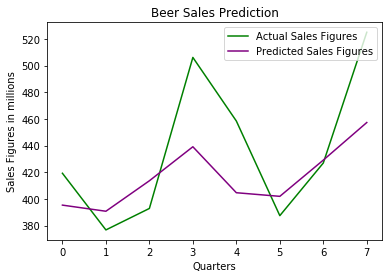

In [96]:
# Plots

plt.plot(test, color = 'green', label = 'Actual Sales Figures')
plt.plot(predictions_actual, color = 'purple', label = 'Predicted Sales Figures')

plt.title('Beer Sales Prediction')
plt.xlabel('Quarters')
plt.ylabel('Sales Figures in millions')

plt.legend()
plt.show()


#### Calculating RMSE

In [98]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(test, predictions_actual))
print(rmse)

40.90388005212444
